In [ ]:
!pip install --quiet numpy pandas matplotlib yfinance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Calculate returns
def calculate_returns(data):
    returns = data.pct_change().dropna()
    return returns

# Simulate portfolios
def simulate_portfolios(returns, num_portfolios=10000):
    num_assets = len(returns.columns)
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        portfolio_return = np.sum(weights * returns.mean()) * 252  # Annualize return
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))  # Annualize risk

        results[0,i] = portfolio_return
        results[1,i] = portfolio_stddev
        results[2,i] = results[0,i] / results[1,i]  # Sharpe Ratio
    return results

# Plot efficient frontier
def plot_efficient_frontier(results):
    plt.figure(figsize=(10, 6))
    plt.scatter(results[1], results[0], c=results[2], cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    plt.title('Efficient Frontier')
    plt.xlabel('Risk (Standard Deviation)')
    plt.ylabel('Return')
    plt.show()


[*********************100%%**********************]  4 of 4 completed


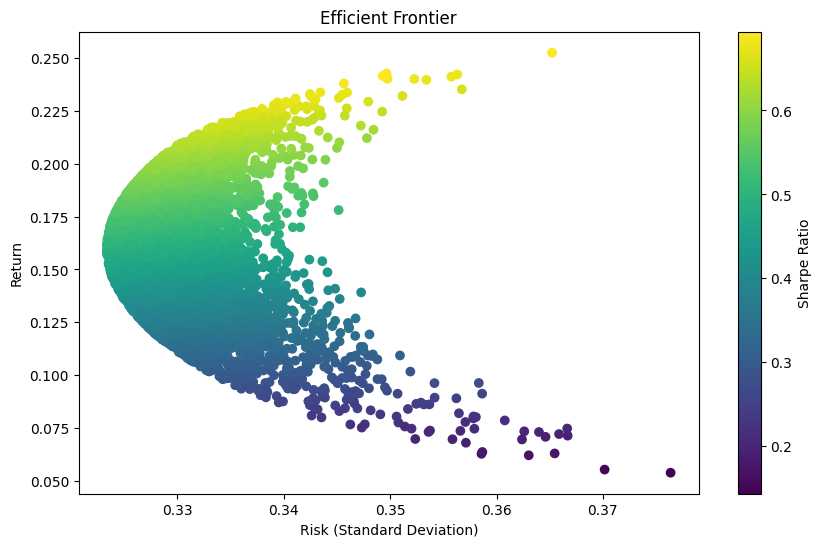

In [ ]:
# Define parameters
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Example tickers
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch data
data = get_data(tickers, start_date, end_date)

# Calculate returns
returns = calculate_returns(data)

# Simulate portfolios
results = simulate_portfolios(returns)

# Plot efficient frontier
plot_efficient_frontier(results)
